## Correlation Between Political Parties and Subsidy Allocation in South Holland

As a resident of the Province of South Holland, I am interested in exploring whether the coalition of certain political parties influences the allocation of subsidies. 

The Province of South Holland provides all its subsidy data as open data, which can be accessed here: [South Holland Subsidy Register](https://subsidieregister.zuid-holland.nl).

### Objective
With the assistance of ChatGPT, I aim to analyze whether spending patterns vary or if there is any correlating with the political party coalition currently in power.


### Author
Michael de Winter

In [17]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch 
import plotly.graph_objects as go
import os.path
import random

### Map years to coalitions and standardization of subsidies

In [2]:
# From ChatGTP with map the year to the political coalition party which was then in power
def map_parties(year):
    if year >= 2023:
        return "BBB, VVD, GroenLinks, D66, PvdA, PVV"
    elif year >= 2019:
        return "Forum for Democracy (FvD), VVD, CDA, GroenLinks, D66"
    elif year >= 2015:
        return "VVD, CDA, D66, SP"
    elif year >= 2011:
        return "VVD, CDA, D66, PVV"
    elif year >= 2007:
        return "CDA, VVD, PvdA"
    elif year >= 2003:
        return "CDA, VVD, D66"
    elif year >= 1999:
        return "CDA, VVD, D66"
    elif year >= 1995:
        return "CDA, VVD, D66"
    else:
        return "CDA, PvdA, VVD"
    
# Generalize the thema's of certain subsidies for normalization and comparison across year.
# Mostly let ChatGTP come up with these thema's with additional checking from me.   
def map_theme(category):
    """Determine the theme(s) for a given category using if statements."""
    themes = []

    if category in [
        '3.2 Verduurzaming gebouwde omgeving',       
        '3.1 Schone en duurzame elektriciteitsvoorziening',
        '3.3 Duurzaam energie-en grondstoffensysteem in de industrie'
    ]:
        themes.append('Duurzaamheid')

    if category in [
        '5.1 Gezonde natuur',
        '5.3 Leven met water',
        '7.1 Bevorderen verbetering milieukwaliteit en gezondheid',
        '7.3 Klimaatbestendig Zuid-Holland'
    ]:
        themes.append('Natuur & Milieu')

    if category in [
        '2.1 Snel van A naar B',
        '2.2 Beheer en onderhoud: op orde en duurzaam',
        '2.1 Duurzame en veilige bereikbaarheid voor iedereen',
        '2.3 Veilig en duurzaam'
    ]:
        themes.append('Mobiliteit')

    if category in [
        '4.3 Erfgoed, cultuur en toerisme',
        '4.2 Erfgoed en Cultuur'
    ]:
        themes.append('Cultuur & Erfgoed')

    if category in [
        '4.1 Innovatie: richting duurzaam en digitaal',
        '4.1 Toekomstbestendig economisch vestigingsklimaat',
        '4.2 Creëren van een rijk vestigingsklimaat'
    ]:
        themes.append('Economie & Innovatie')

    if category in [
        '5.2 Toekomstbestendige landbouw',
        '5.2 Transitie landbouw'
    ]:
        themes.append('Landbouw & Voedsel')

    if category in [
        '6.1 Voldoende juiste woningen op de juiste plek',
        '6.1 Wonen'
    ]:
        themes.append('Wonen')

    if category in [
        '1.1 Beter bestuur',
        '1.2 Sterke samenleving'
    ]:
        themes.append('Bestuur')

    if category in [
        "6.3 Afspraken met regio's",
        '6.2 Vitaliteit en kwaliteit in de leefomgeving'
    ]:
        themes.append('Regionale Ontwikkeling')

    if category in [
        '7.2 Bevorderen recreatie duurzame toerisme en sport',
        '7.2 Gezonde en bewegingsvriendelijke leefomgeving'
    ]:
        themes.append('Recreatie & Sport')

    return ", ".join(themes) if themes else "Onbekend Thema"

In [3]:
load_previous = True

### Get Data

In [4]:
# Fetch data from the API can be skipped if a parquet file is already found.
if os.path.exists("subsidie_data_pzh.parquet") and load_previous is True:

    results = pd.read_parquet("subsidie_data_pzh.parquet")

else:
    results = pd.DataFrame()    
    for xi in range(1,json.loads(requests.get("https://subsidieregister.zuid-holland.nl/api/subsidies").text)["paging"]['totaalnrofpages']):
        url = "https://subsidieregister.zuid-holland.nl/api/subsidies?pageno="+str(xi)  # Replace with the actual URL
        response = requests.get(url)

        # Print the response content
        print("Status Code:", response.status_code)
        print("Response Body:", response.text)
        data = json.loads(response.text)
        results = pd.concat([results,pd.DataFrame(data['results'])])

In [ ]:
len(results['dossiernummer'])

In [31]:
len(results.drop_duplicates(subset='dossiernummer'))

3278

In [33]:
results = results.drop_duplicates(subset='dossiernummer')

### Make new columns based on data

In [34]:
# Add the political coalition and a more generalized theme.
results['partijen'] = results.apply(lambda x: map_parties(x.jaar), axis=1)
results["Thema"] = results.apply(lambda x: map_theme(x.doelstellingnaam), axis=1)

/var/folders/bn/flln7g490l75vv4q25m_pgfw0000gn/T/ipykernel_34395/665483179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['partijen'] = results.apply(lambda x: map_parties(x.jaar), axis=1)
/var/folders/bn/flln7g490l75vv4q25m_pgfw0000gn/T/ipykernel_34395/665483179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["Thema"] = results.apply(lambda x: map_theme(x.doelstellingnaam), axis=1)


In [35]:
# Group by based on parties, year and thema's for making bar charts
df =results.groupby(['partijen','jaar', 'Thema']).agg(
    total_subsidy=('verleendbedrag', 'sum'),
    number_of_subsidies=('verleendbedrag', 'count')
).reset_index()

# Plotting of data

/var/folders/bn/flln7g490l75vv4q25m_pgfw0000gn/T/ipykernel_34395/3536733871.py:127: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


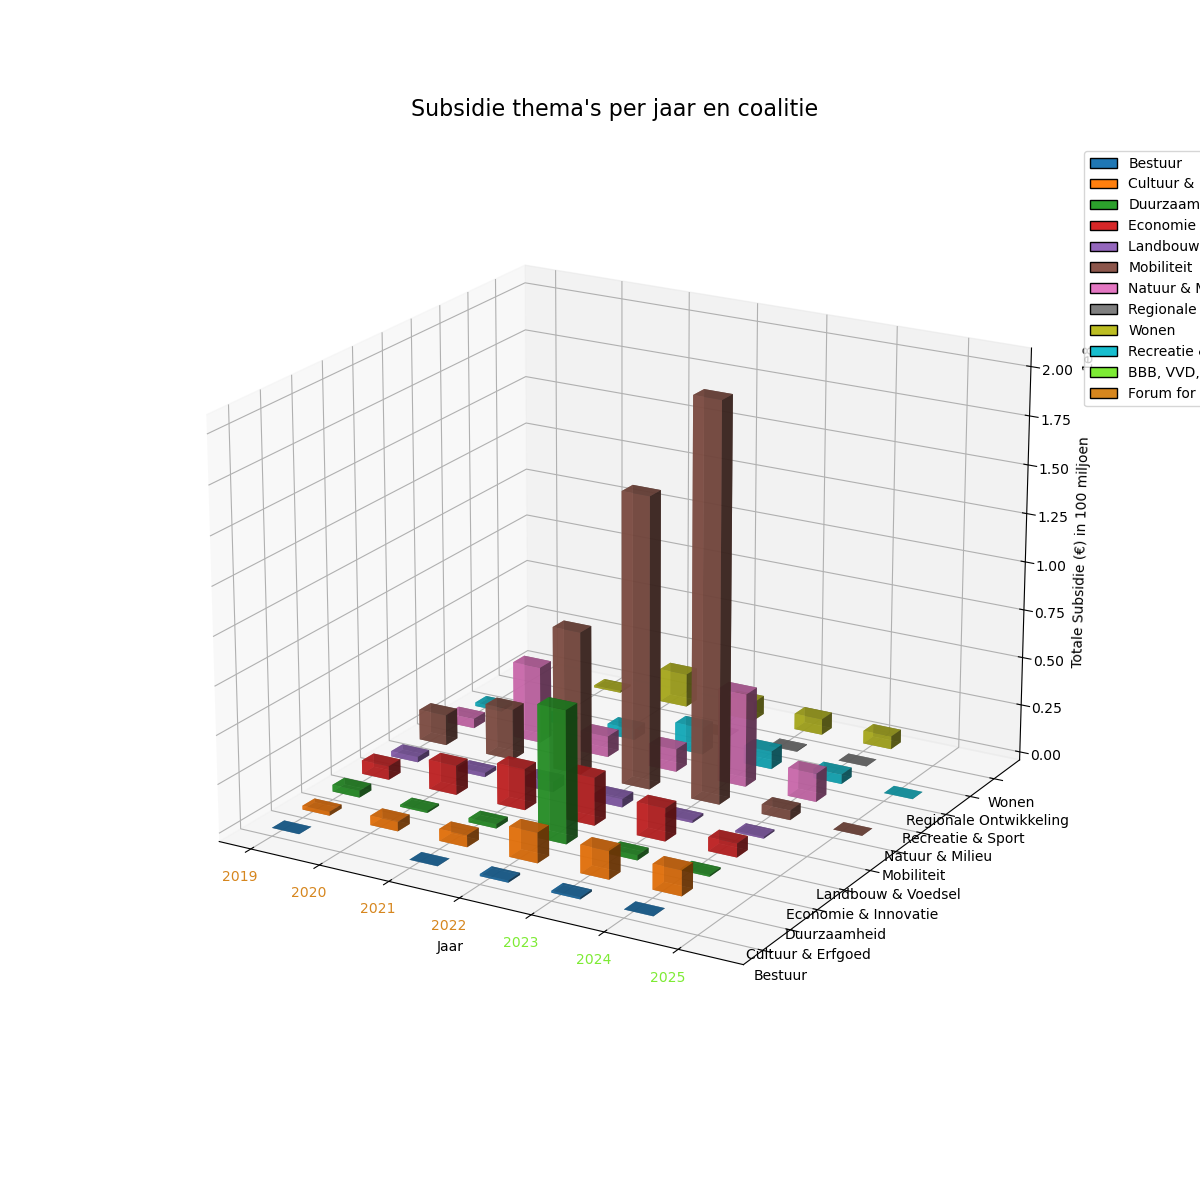

In [37]:
# Create a 3D bar chart with the colours of the years for which political coalition was in charge and
# x-axis: year which colour for political party, y-axis: the theme, z-axis: the total amount of granted subsidy.
%matplotlib widget
parties_colors = {
    "BBB, VVD, GroenLinks, D66, PvdA, PVV":  "#7deb34",
    "Forum for Democracy (FvD), VVD, CDA, GroenLinks, D66": "#d6861e",
}


theme_colors = {
    'Bestuur': '#1f77b4',
    'Cultuur & Erfgoed': '#ff7f0e',
    'Duurzaamheid': '#2ca02c',
    'Economie & Innovatie': '#d62728',
    'Landbouw & Voedsel': '#9467bd',
    'Mobiliteit': '#8c564b',
    'Natuur & Milieu': '#e377c2',
    'Regionale Ontwikkeling': '#7f7f7f',
    'Wonen': '#bcbd22',
    'Recreatie & Sport': '#17becf'
}

def get_theme_color(thema):
    """Return the color for a given Thema. Fallback to 'gray' if not in the dict."""
    return theme_colors.get(thema, 'gray')

# -----------------------------------------------------------
# 5) Convert jaar (X-axis) and Thema (Y-axis) to numeric idx
# -----------------------------------------------------------
unique_years = sorted(df['jaar'].unique())
unique_themas = sorted(df['Thema'].unique())

year_to_index = {year: i for i, year in enumerate(unique_years)}
thema_to_index = {thema: i for i, thema in enumerate(unique_themas)}

# -----------------------------------------------------------
# 6) Create 3D plot
# -----------------------------------------------------------
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

dx = 0.4
dy = 0.4

for _, row in df.iterrows():
    x_index = year_to_index[row['jaar']]
    y_index = thema_to_index[row['Thema']]
    
    z_lower = 0
    z_height = row['total_subsidy']
    
    color = get_theme_color(row['Thema'])
    
    ax.bar3d(
        x_index,  
        y_index,  
        z_lower,  
        dx,       
        dy,       
        z_height, 
        color=color,
        alpha=0.8
    )

# -----------------------------------------------------------
# 7) Add Legend for Thema Colors
# -----------------------------------------------------------
legend_patches = [
    Patch(facecolor=color, edgecolor='black', label=thema)
    for thema, color in theme_colors.items()
]


# If there's any Thema not in theme_colors, show 'Other':
if any(t not in theme_colors for t in df['Thema'].unique()):
    legend_patches.append(Patch(facecolor='gray', edgecolor='black', label='Other'))


party_legend_patches = [
    Patch(facecolor=c, edgecolor='black', label=p)
    for p, c in parties_colors.items()
]

legend_patches = legend_patches + party_legend_patches

ax.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1.0, 1.0))

# -----------------------------------------------------------
# 8) X-axis: Each Jaar in a color based on its parties
# -----------------------------------------------------------
x_labels = [str(year) for year in unique_years]

ax.set_xticks(range(len(unique_years)))
ax.set_xticklabels(x_labels)

# Now color each x-tick label by the parties that apply to its year
for i, tick_label in enumerate(ax.get_xticklabels()):
    year = unique_years[i]
    # Figure out which parties are associated with this year
    party_str = map_parties(year)
    # Look up the color (or default to black if not found)
    color = parties_colors.get(party_str, "black")
    tick_label.set_color(color)

# (Optional) Add an extra legend for the parties color coding

#ax.legend(
#    handles=party_legend_patches,
#    title="Partijen (X-axis)",
#    loc='lower left',
#    bbox_to_anchor=(1.0, 0.6)
#)

# -----------------------------------------------------------
# 9) Y-axis & Z-axis formatting
# -----------------------------------------------------------
ax.set_title("Subsidie thema's per jaar en coalitie", fontsize=16, pad=20)
ax.set_yticks(range(len(unique_themas)))
ax.set_yticklabels(unique_themas)
ax.set_ylabel('')
ax.set_zlabel('Totale Subsidie (€) in 100 miljoen')
ax.set_xlabel('Jaar')

# Adjust the viewing angle for clarity
ax.view_init(elev=20, azim=-60)

plt.tight_layout()
plt.show()

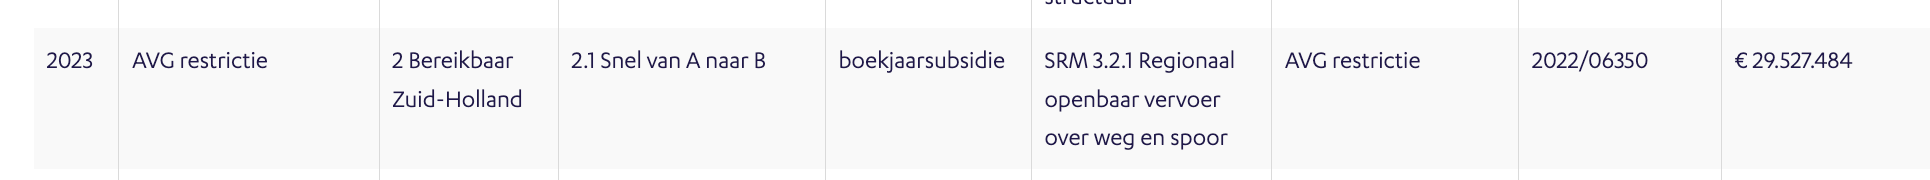

Conclusion

Too spread out and too few data of only 2 different coalition to really make a statement about correlation

In [38]:
# Group by based on parties, year and thema's for making bar charts

df_aanvrager =results.groupby(['partijen','jaar', 'aanvrager']).agg(
    total_subsidy=('verleendbedrag', 'sum'),
    number_of_subsidies=('verleendbedrag', 'count')
).reset_index()

In [39]:
unique_aanvragers = df_aanvrager['aanvrager'].unique()

/var/folders/bn/flln7g490l75vv4q25m_pgfw0000gn/T/ipykernel_34395/4286682253.py:116: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


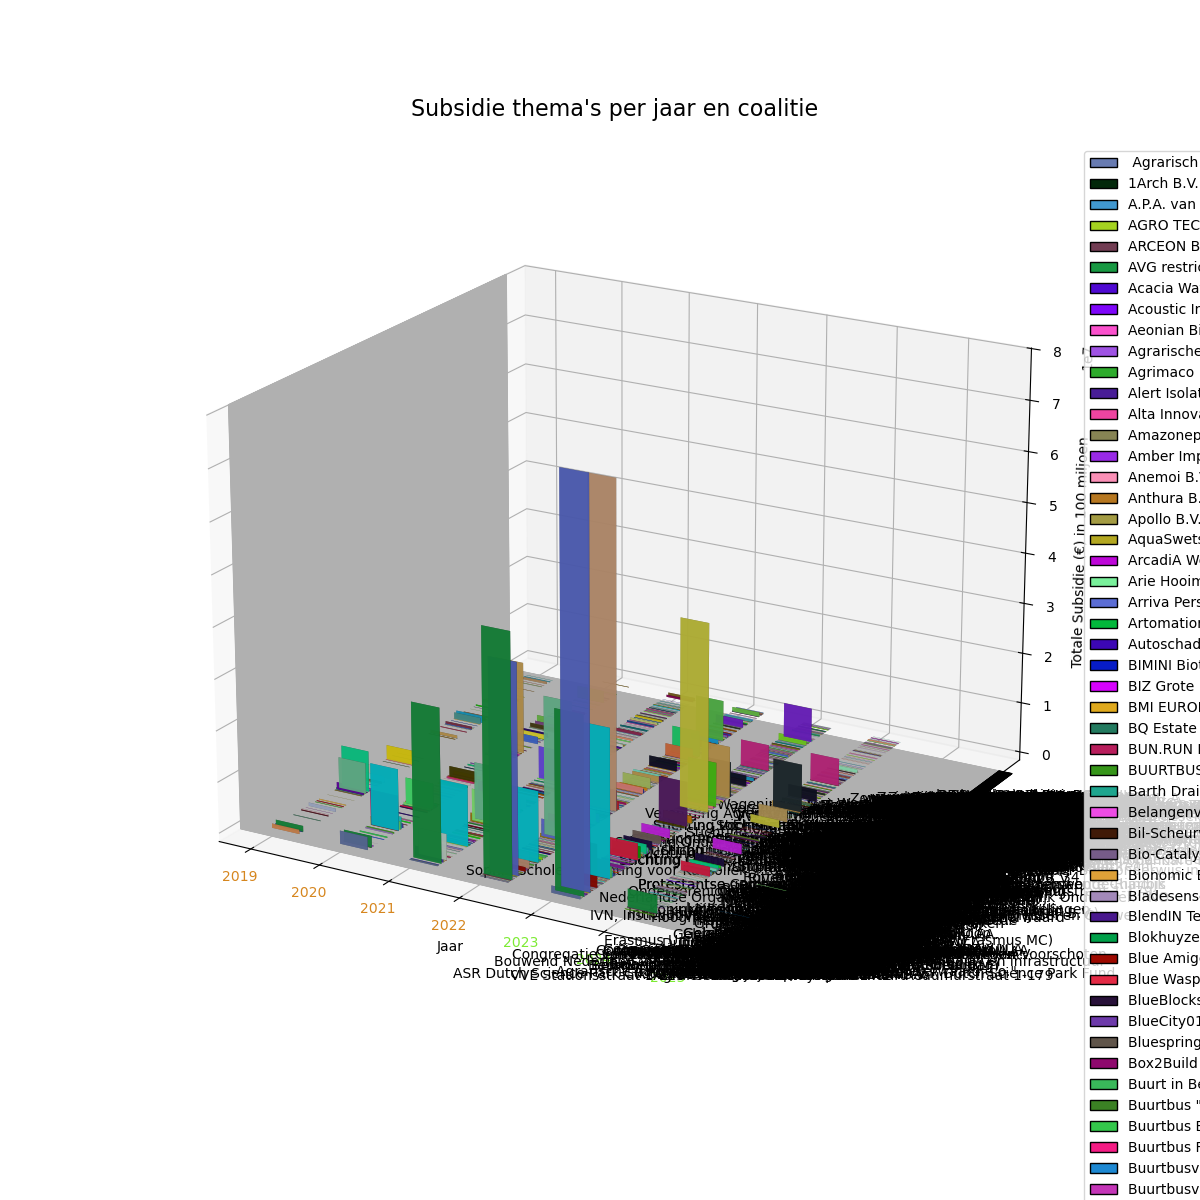

In [40]:
# Create a 3D bar chart with the colours of the years for which political coalition was in charge and
# x-axis: year which colour for political party, y-axis: the theme, z-axis: the total amount of granted subsidy.
%matplotlib widget
parties_colors = {
    "BBB, VVD, GroenLinks, D66, PvdA, PVV":  "#7deb34",
    "Forum for Democracy (FvD), VVD, CDA, GroenLinks, D66": "#d6861e",
}


theme_colors = {aanvrager: "#{:06x}".format(random.randint(0, 0xFFFFFF)) for aanvrager in unique_aanvragers}

def get_theme_color(thema):
    """Return the color for a given Thema. Fallback to 'gray' if not in the dict."""
    return theme_colors.get(thema, 'gray')

# -----------------------------------------------------------
# 5) Convert jaar (X-axis) and Thema (Y-axis) to numeric idx
# -----------------------------------------------------------
unique_years = sorted(df_aanvrager['jaar'].unique())
unique_themas = sorted(df_aanvrager['aanvrager'].unique())

year_to_index = {year: i for i, year in enumerate(unique_years)}
thema_to_index = {thema: i for i, thema in enumerate(unique_themas)}

# -----------------------------------------------------------
# 6) Create 3D plot
# -----------------------------------------------------------
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

dx = 0.4
dy = 0.4

for _, row in df_aanvrager.iterrows():
    x_index = year_to_index[row['jaar']]
    y_index = thema_to_index[row['aanvrager']]
    
    z_lower = 0
    z_height = row['total_subsidy']
    
    color = get_theme_color(row['aanvrager'])
    
    ax.bar3d(
        x_index,  
        y_index,  
        z_lower,  
        dx,       
        dy,       
        z_height, 
        color=color,
        alpha=0.8
    )

# -----------------------------------------------------------
# 7) Add Legend for Thema Colors
# -----------------------------------------------------------
legend_patches = [
    Patch(facecolor=color, edgecolor='black', label=thema)
    for thema, color in theme_colors.items()
]


# If there's any Thema not in theme_colors, show 'Other':
if any(t not in theme_colors for t in df_aanvrager['aanvrager'].unique()):
    legend_patches.append(Patch(facecolor='gray', edgecolor='black', label='Other'))


party_legend_patches = [
    Patch(facecolor=c, edgecolor='black', label=p)
    for p, c in parties_colors.items()
]

legend_patches = legend_patches + party_legend_patches

ax.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1.0, 1.0))

# -----------------------------------------------------------
# 8) X-axis: Each Jaar in a color based on its parties
# -----------------------------------------------------------
x_labels = [str(year) for year in unique_years]

ax.set_xticks(range(len(unique_years)))
ax.set_xticklabels(x_labels)

# Now color each x-tick label by the parties that apply to its year
for i, tick_label in enumerate(ax.get_xticklabels()):
    year = unique_years[i]
    # Figure out which parties are associated with this year
    party_str = map_parties(year)
    # Look up the color (or default to black if not found)
    color = parties_colors.get(party_str, "black")
    tick_label.set_color(color)

# (Optional) Add an extra legend for the parties color coding

#ax.legend(
#    handles=party_legend_patches,
#    title="Partijen (X-axis)",
#    loc='lower left',
#    bbox_to_anchor=(1.0, 0.6)
#)

# -----------------------------------------------------------
# 9) Y-axis & Z-axis formatting
# -----------------------------------------------------------
ax.set_title("Subsidie thema's per jaar en coalitie", fontsize=16, pad=20)
ax.set_yticks(range(len(unique_themas)))
ax.set_yticklabels(unique_themas)
ax.set_ylabel('')
ax.set_zlabel('Totale Subsidie (€) in 100 miljoen')
ax.set_xlabel('Jaar')

# Adjust the viewing angle for clarity
ax.view_init(elev=20, azim=-60)

plt.tight_layout()
plt.show()

In [41]:
df_aanvrager.sort_values(['total_subsidy'], ascending=False)

,partijen,jaar,aanvrager,total_subsidy,number_of_subsidies
21,"BBB, VVD, GroenLinks, D66, PvdA, PVV",2023,Arriva Personenvervoer Nederland B.V.,78464071,2
1710,"Forum for Democracy (FvD), VVD, CDA, GroenLink...",2022,N.V. Nederlandse Gasunie,64800000,1
1488,"Forum for Democracy (FvD), VVD, CDA, GroenLink...",2022,AVG restrictie,47341717,79
1500,"Forum for Democracy (FvD), VVD, CDA, GroenLink...",2022,Arriva Personenvervoer Nederland B.V.,40868582,3
292,"BBB, VVD, GroenLinks, D66, PvdA, PVV",2023,Qbuzz B.V.,37149730,2
...,...,...,...,...,...
483,"BBB, VVD, GroenLinks, D66, PvdA, PVV",2023,Swingend Fit,1500,1
486,"BBB, VVD, GroenLinks, D66, PvdA, PVV",2023,T. Wezelenburg Handelskwekerijen B.V.,1494,1
557,"BBB, VVD, GroenLinks, D66, PvdA, PVV",2023,Y.J.A. van der Hulst Beheer B.V.,1360,1
816,"BBB, VVD, GroenLinks, D66, PvdA, PVV",2024,Stichting Golf voor Gehandicapten,1202,1


In [43]:
df[df['jaar'] == 2024]

,partijen,jaar,Thema,total_subsidy,number_of_subsidies
10,"BBB, VVD, GroenLinks, D66, PvdA, PVV",2024,Bestuur,100000,3
11,"BBB, VVD, GroenLinks, D66, PvdA, PVV",2024,Cultuur & Erfgoed,13064289,83
12,"BBB, VVD, GroenLinks, D66, PvdA, PVV",2024,Duurzaamheid,884448,46
13,"BBB, VVD, GroenLinks, D66, PvdA, PVV",2024,Economie & Innovatie,7149109,187
14,"BBB, VVD, GroenLinks, D66, PvdA, PVV",2024,Landbouw & Voedsel,861194,43
15,"BBB, VVD, GroenLinks, D66, PvdA, PVV",2024,Mobiliteit,4992030,16
16,"BBB, VVD, GroenLinks, D66, PvdA, PVV",2024,Natuur & Milieu,14628541,62
17,"BBB, VVD, GroenLinks, D66, PvdA, PVV",2024,Recreatie & Sport,4924369,88
18,"BBB, VVD, GroenLinks, D66, PvdA, PVV",2024,Regionale Ontwikkeling,75000,5
19,"BBB, VVD, GroenLinks, D66, PvdA, PVV",2024,Wonen,6741457,87


In [44]:
results[results['jaar'] == 2024]

,jaar,aanvrager,verleendbedrag,subsidietype,doelstellingnaam,programmanaam,regelingnaam,grondslagnaam,projectnaam,dossiernummer,partijen,Thema
17,2024,"Stichting ""Het Zuid-Hollands Landschap""",9336789,projectsubsidie,5.1 Gezonde natuur,5 Versterken natuur in Zuid-Holland,SKNL Kwaliteitsimpuls natuur en landschap,Regeling,75028 functiewaardering en inrichting,2024/01595,"BBB, VVD, GroenLinks, D66, PvdA, PVV",Natuur & Milieu
6,2024,Stichting ProBiblio,5421411,boekjaarsubsidie,"4.3 Erfgoed, cultuur en toerisme",4 Een concurrerend Zuid-Holland,Probiblio t.b.v. boekjaarsubsidie,Begroting,Boekjaarsubsidie 2024,2023/04315,"BBB, VVD, GroenLinks, D66, PvdA, PVV",Cultuur & Erfgoed
8,2024,River Operations South Holland B.V.,2457060,boekjaarsubsidie,2.1 Duurzame en veilige bereikbaarheid voor ie...,2 Bereikbaar Zuid-Holland,River Operations South Holland B.V. t.b.v. Exp...,Begroting,Boekjaar 2024 Veerdienst Maassluis-Rozenburg,2024/00137,"BBB, VVD, GroenLinks, D66, PvdA, PVV",Mobiliteit
9,2024,AVG restrictie,2450040,boekjaarsubsidie,4.1 Innovatie: richting duurzaam en digitaal,4 Een concurrerend Zuid-Holland,Innovation Quarter t.b.v. duurzaam versterken ...,Begroting,AVG restrictie,2024/00472,"BBB, VVD, GroenLinks, D66, PvdA, PVV",Economie & Innovatie
13,2024,Stichting Erfgoedhuis Zuid-Holland,2263565,boekjaarsubsidie,"4.3 Erfgoed, cultuur en toerisme",4 Een concurrerend Zuid-Holland,Erfgoedhuis Zuid-Holland,Begroting,Boekjaarsubsidie,2023/04327,"BBB, VVD, GroenLinks, D66, PvdA, PVV",Cultuur & Erfgoed
...,...,...,...,...,...,...,...,...,...,...,...,...
11,2024,AVG restrictie,1311,projectsubsidie,5.1 Gezonde natuur,5 Versterken natuur in Zuid-Holland,Srg 2.7 Beschermde natuurmonumenten,Regeling,AVG restrictie,2024/00011,"BBB, VVD, GroenLinks, D66, PvdA, PVV",Natuur & Milieu
15,2024,Stichting Golf voor Gehandicapten,1202,projectsubsidie,7.2 Bevorderen recreatie duurzame toerisme en ...,7 Gezond en veilig Zuid-Holland,Srsg-openstellingsbesluit subsidie sportactivi...,Regeling,De GvoorG competitie 2024,2024/00517,"BBB, VVD, GroenLinks, D66, PvdA, PVV",Recreatie & Sport
16,2024,AVG restrictie,1200,projectsubsidie,5.2 Toekomstbestendige landbouw,5 Versterken natuur in Zuid-Holland,Srg 2.19 Landbouwadvies,Regeling,AVG restrictie,2024/01055,"BBB, VVD, GroenLinks, D66, PvdA, PVV",Landbouw & Voedsel
17,2024,AVG restrictie,1200,projectsubsidie,5.2 Toekomstbestendige landbouw,5 Versterken natuur in Zuid-Holland,Srg 2.19 Landbouwadvies,Regeling,AVG restrictie,2024/01289,"BBB, VVD, GroenLinks, D66, PvdA, PVV",Landbouw & Voedsel
